In [1]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
data = pd.read_excel(r'C:\Users\acer\Dropbox\PC\Downloads\HousePricePrediction.xlsx')
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


## Removing Duplicates and Missing Values

In [3]:
# checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# checking for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

Missing values in each column:
Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

Number of duplicate rows: 0


In [4]:
# replacing missing values in 'MSZoning' with its mode
mszoning_mode = data['MSZoning'].mode()[0]
data['MSZoning'].fillna(mszoning_mode, inplace=True)

# replacing missing values in 'Exterior1st' with its mode
exterior1st_mode = data['Exterior1st'].mode()[0]
data['Exterior1st'].fillna(exterior1st_mode, inplace=True)

# replacing missing values in 'BsmtFinSF2' with its mean
bsmtfinsf2_mean = data['BsmtFinSF2'].mean()
data['BsmtFinSF2'].fillna(bsmtfinsf2_mean, inplace=True)

# replacing missing values in 'TotalBsmtSF' with its mean
totalbsmtsf_mean = data['TotalBsmtSF'].mean()
data['TotalBsmtSF'].fillna(totalbsmtsf_mean, inplace=True)

# verifying the missing values have been filled
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         0
TotalBsmtSF        0
SalePrice       1459
dtype: int64


## Managing Datatypes

In [5]:
# converting MSSubClass to a nominal (categorical) datatype
data['MSSubClass'] = data['MSSubClass'].astype('category')

# converting OverallCond to an ordinal datatype
data['OverallCond'] = data['OverallCond'].astype('category')

# converting MSZoning to an ordinal datatype
data['MSZoning'] = data['MSZoning'].astype('category')

# converting LotConfig to an ordinal datatype
data['LotConfig'] = data['LotConfig'].astype('category')

# converting BldgType to an ordinal datatype
data['BldgType'] = data['BldgType'].astype('category')

# converting Exterior1st to an ordinal datatype
data['Exterior1st'] = data['Exterior1st'].astype('category')

# converting YearBuilt and YearRemodAdd to datetime
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format='%Y')
data['YearRemodAdd'] = pd.to_datetime(data['YearRemodAdd'], format='%Y')

# Verify the changes
print(data.dtypes)

Id                       int64
MSSubClass            category
MSZoning              category
LotArea                  int64
LotConfig             category
BldgType              category
OverallCond           category
YearBuilt       datetime64[ns]
YearRemodAdd    datetime64[ns]
Exterior1st           category
BsmtFinSF2             float64
TotalBsmtSF            float64
SalePrice              float64
dtype: object


## Exploratory Data Analysis

In [6]:
# dropping the 'id' column
data = data.drop(columns=['Id'])

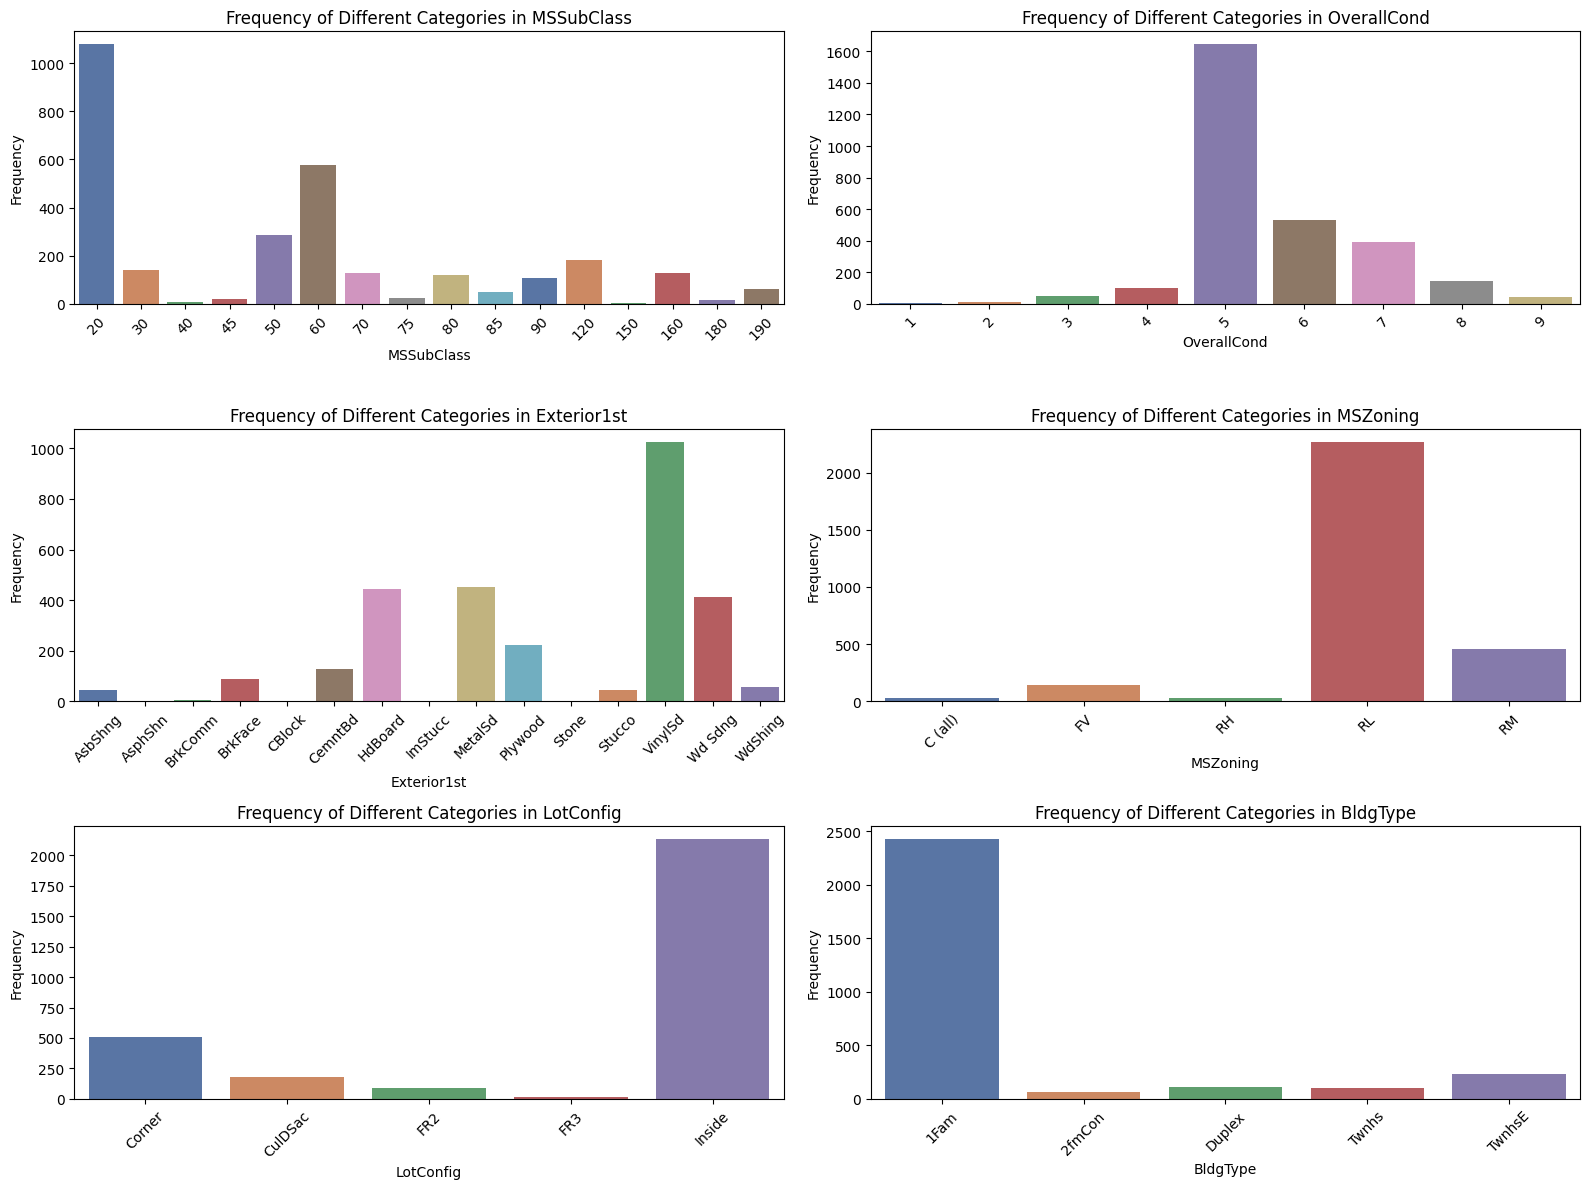

In [7]:
# analysing frequency of different categories in the categorical variables
# creating a list of categorical variables
categorical_vars = ['MSSubClass', 'OverallCond', 'Exterior1st', 'MSZoning', 'LotConfig', 'BldgType']

# setting up the figure and axes
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

# flattening the array of axes for easy iteration
axs = axs.flatten()

# looping through the categorical variables and create a bar plot for each
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data, palette='deep', ax=axs[i])
    axs[i].set_title(f'Frequency of Different Categories in {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)             # rotating x-axis labels if needed

plt.tight_layout()
plt.show()

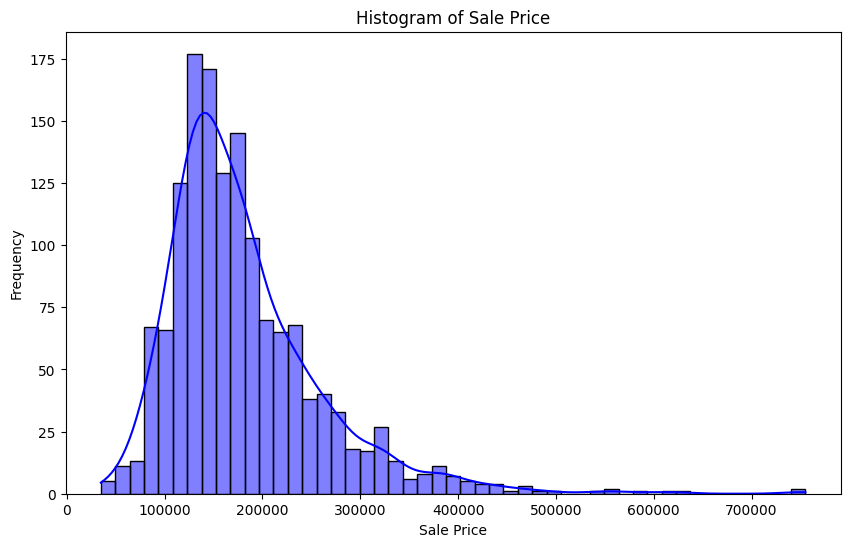

In [8]:
# analyzing the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue')
plt.title('Histogram of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Apparently, the sale price for houses varies from 35,000  to 750,000 dollars depending upon various characteristics, including lot area, MS zoning, building type, antique architectural design, year of building, etc.

In [9]:
# selecting only numerical columns to check correlation between dataset features
numerical_df = data.select_dtypes(include=['int64', 'float64'])

# calculating the correlation matrix
corr_matrix = numerical_df.corr()
corr_matrix

,LotArea,BsmtFinSF2,TotalBsmtSF,SalePrice
LotArea,1.000000,0.084055,0.254125,0.263843
BsmtFinSF2,0.084055,1.000000,0.089410,-0.011378
TotalBsmtSF,0.254125,0.089410,1.000000,0.613581
SalePrice,0.263843,-0.011378,0.613581,1.000000


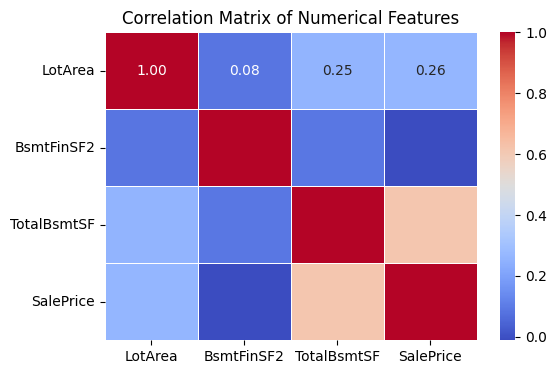

In [10]:
# creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix highlights a positive correlation of 0.6 between total basement area and sale price of houses. Evidently, with the increase in basement area, the house prices also increased.

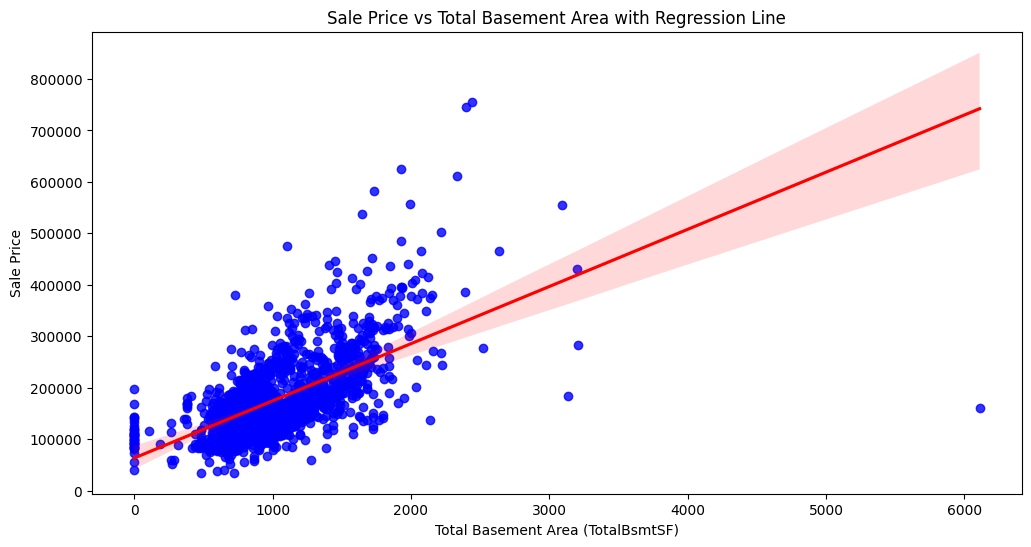

In [11]:
# plotting TotalBsmtSF vs SalePrice
plt.figure(figsize=(12, 6))
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Total Basement Area (TotalBsmtSF)')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Total Basement Area with Regression Line')
plt.show()

A clear positive linear relationship exists between Total Basement Area and Sale Price. As the total basement area increases, the sale price tends to increase. But, the variance of SalePrice appears to increase with TotalBsmtSF (Heteroscedasticity). This means that for larger basement areas, the spread (variance) in sale prices is wider. This is evident from the increasing width of the confidence interval (shaded region) as TotalBsmtSF increases.

Hence, there are some outliers, particularly in the higher range of TotalBsmtSF. These are points that are far from the majority of the data points and may affect the regression line and its interpretation.

_*Heteroscedasticity is present when the variability of a variable is unequal across the range of values of a second variable that predicts it. In this plot, heteroscedasticity is indicated by the funnel-shaped pattern of the residuals.*_

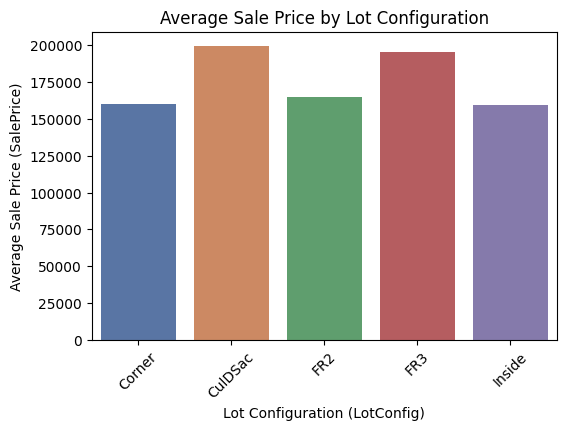

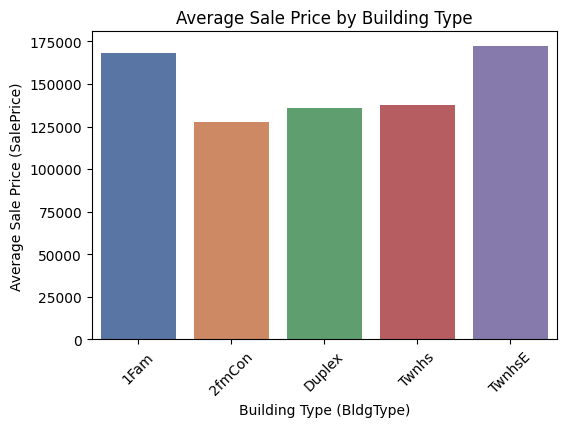

In [12]:
# preferring median over mean to eliminate the impact of outliers in right-skewed SalePrice data
# calculating the median SalePrice for each LotConfig category
lotconfig_means = data.groupby('LotConfig')['SalePrice'].median().reset_index()

# bar chart for LotConfig and SalePrice
plt.figure(figsize=(6, 4))
sns.barplot(x='LotConfig', y='SalePrice', data=lotconfig_means, palette='deep')
plt.xlabel('Lot Configuration (LotConfig)')
plt.ylabel('Average Sale Price (SalePrice)')
plt.title('Average Sale Price by Lot Configuration')
plt.xticks(rotation=45)
plt.show()

# calculating the median SalePrice for each BldgType category
bldgtype_means = data.groupby('BldgType')['SalePrice'].median().reset_index()

# bar chart for BldgType and SalePrice
plt.figure(figsize=(6, 4))
sns.barplot(x='BldgType', y='SalePrice', data=bldgtype_means, palette='deep')
plt.xlabel('Building Type (BldgType)')
plt.ylabel('Average Sale Price (SalePrice)')
plt.title('Average Sale Price by Building Type')
plt.xticks(rotation=45)
plt.show()

Surprisingly, houses at cul-de-sac (dead end street) are the most expensive lot configuration around 200,000 dollars, followed by FR3 (frontage on 3 sides of property) at 225,000 dollars. Moreover, 1Fam (single family detached house) and TwnhsE (townhouse end unit) are the most preferred types of houses sold at 170,000 dollars, approximately.

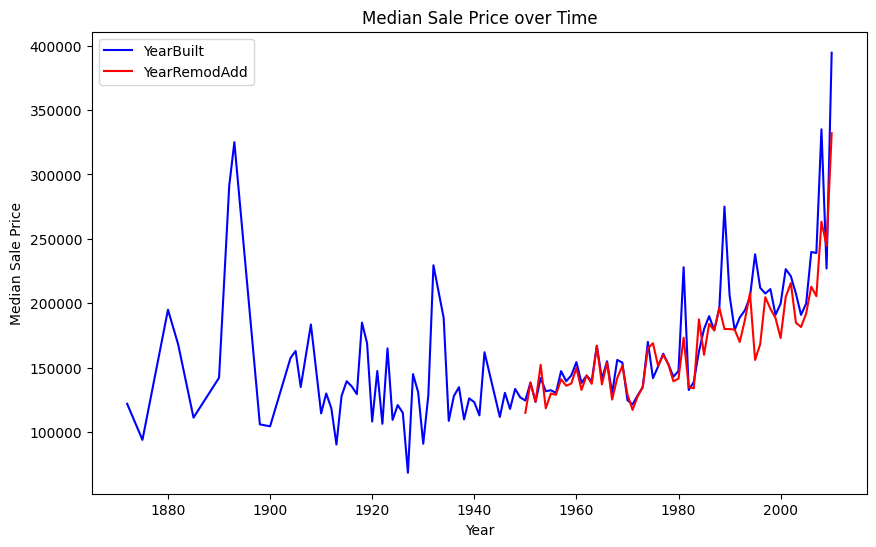

In [13]:
# grouping data by YearBuilt and YearRemodAdd and calculate the median SalePrice
yearbuilt_median = data.groupby('YearBuilt')['SalePrice'].median().reset_index()
yearremodadd_median = data.groupby('YearRemodAdd')['SalePrice'].median().reset_index()

# Line chart for YearBuilt and SalePrice
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearBuilt', y='SalePrice', data=yearbuilt_median, label='YearBuilt', color='blue')

# Line chart for YearRemodAdd and SalePrice
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=yearremodadd_median, label='YearRemodAdd', color='red')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price over Time')
plt.legend()
plt.show()

According to the dataset, before 1945, house price depicted a random trend. But, after 1950, the average sale price followed an increasing trend, until it peaked sharply in recent years (around 2000s). The trend for YearRemodAdd closely followed the trend of YearBuilt, indicating that houses remodeled or expanded in these years generally coped with the market trends of newly built houses. The gap between the two lines is small, showing that the sale price of newly built and remodeled homes are comparable.

**KEY OBSERVATIONS**

_*Late 1800s and Early 1900s*_ 

There are sharp peaks and troughs in the YearBuilt line, indicating that the sale prices of older homes vary widely. This could be due to the historical significance or unique architecture of some houses built during these periods.

_*Mid 1900s*_

The sale prices of houses built during these years show less variability compared to earlier years, and the overall trend is relatively stable with a slow increase. The YearRemodAdd line appears and closely follows the YearBuilt line, indicating that the market value of remodeled homes is similar to new homes during these years.

_*Late 1900s and Early 2000s*_

Both lines show an upward trend, reflecting the overall increase in housing prices. The lines converge more closely, indicating that the difference in sale prices between newly built and remodeled homes has reduced significantly.

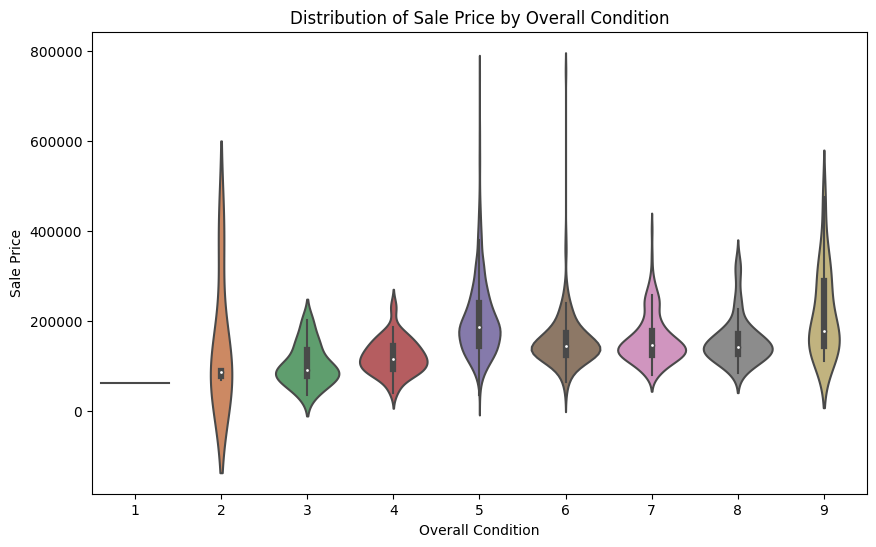

In [14]:
# calculating correlation between OverallCond and SalePrice
corr = data['OverallCond'].corr(data['SalePrice'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='OverallCond', y='SalePrice', data=data, palette='deep')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Price by Overall Condition')
plt.show()

Overall Condition 2 exhibits the highest variability in sale prices with a wide range extending up to 600,000 dollars, followed by Conditions 5, 6 and 9. Furthermore, the median sale price gradually increase with the overall condition untill 5 and then stabilizes for higher conditions.

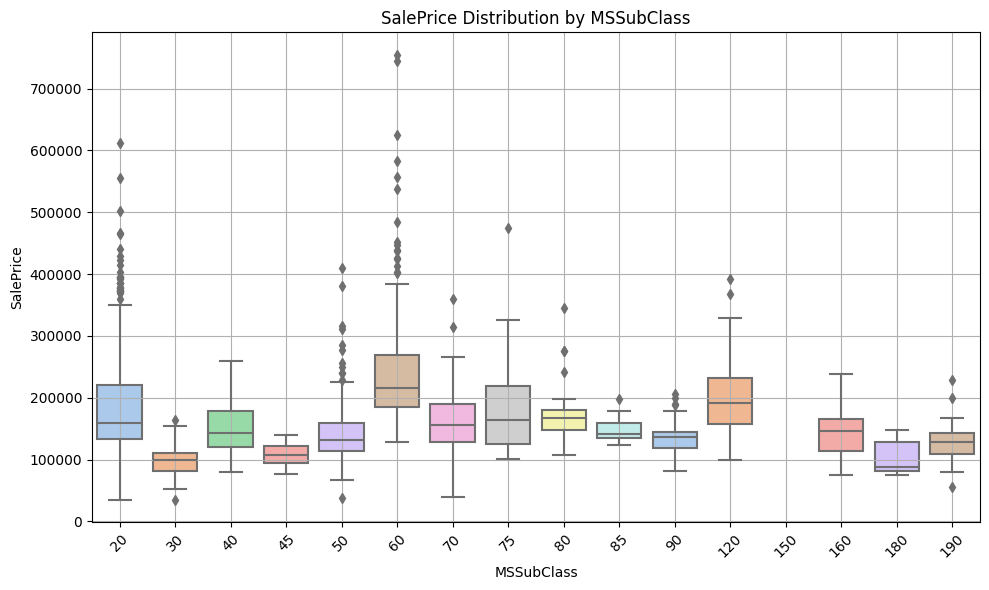

In [15]:
# Boxplot of sale price vs MS subclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=data, palette='pastel')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('SalePrice Distribution by MSSubClass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

Surprisingly, houses belonging to MS Subclass 60 (2-Storey; 1946 & newer styles) appeared to be the most expensive houses, followed by Subclass 120 (1-Storey PUD (Planned Unit Development); 1946 & newer styles) houses and Subclass 70. But, MS Subclass 20 (1-Storey; 1946 & newer styles) and Subclass 60 depicted the most variation in prices, followed by Subclass 50. Moreover, the IQR is large for subclasses 20, 60, 75, and 120, indicating a wider spread of the middle 50% of sale prices.

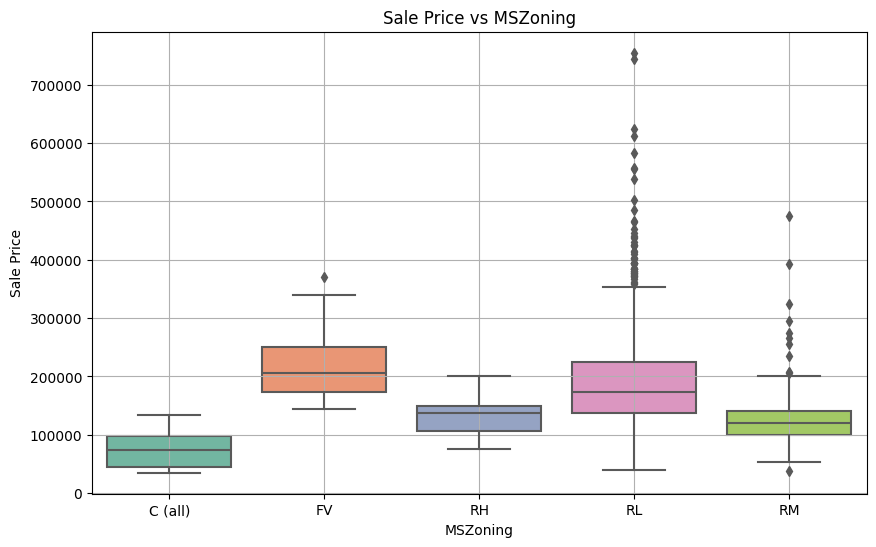

In [16]:
# Boxplot of SalePrice vs MSZoning
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=data, palette='Set2')
plt.title('Sale Price vs MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Sale Price')
plt.grid()
plt.show()

Apparently, houses built in FV that is, floating village residential areas are typically expensive than others. Houses built in low-density residential areas have an unusual higher price range, whereas houses from high-density and commercial regions have more consistent prices. The houses built in commercial regions are the cheapest, followed by the houses constructed in high and medium-density residential locations.

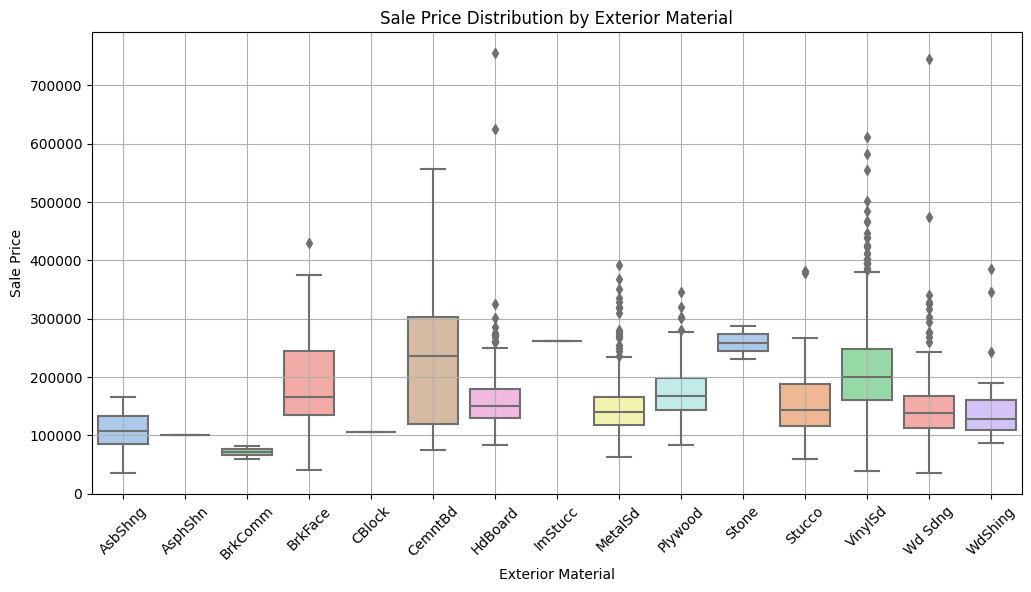

In [17]:
# Boxplot of Sale Price vs Exterior Material
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exterior1st', y='SalePrice', data=data, palette='pastel')
plt.xlabel('Exterior Material')
plt.ylabel('Sale Price')
plt.title('Sale Price Distribution by Exterior Material')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Houses having exterior built using stone and cement board are the most expensive, whereas asbestos shingles, asphalt shingles and brick common exteriors form the cheapest houses. The prices of houses with cement board, brick facing, vinyl siding and stucco are less consistent that is, have a wider spread of IQRs. Furthermore, the prices of houses with exteriors built using hardboard, metal sliding, vinyl sliding and wood sliding carry significant outliers.

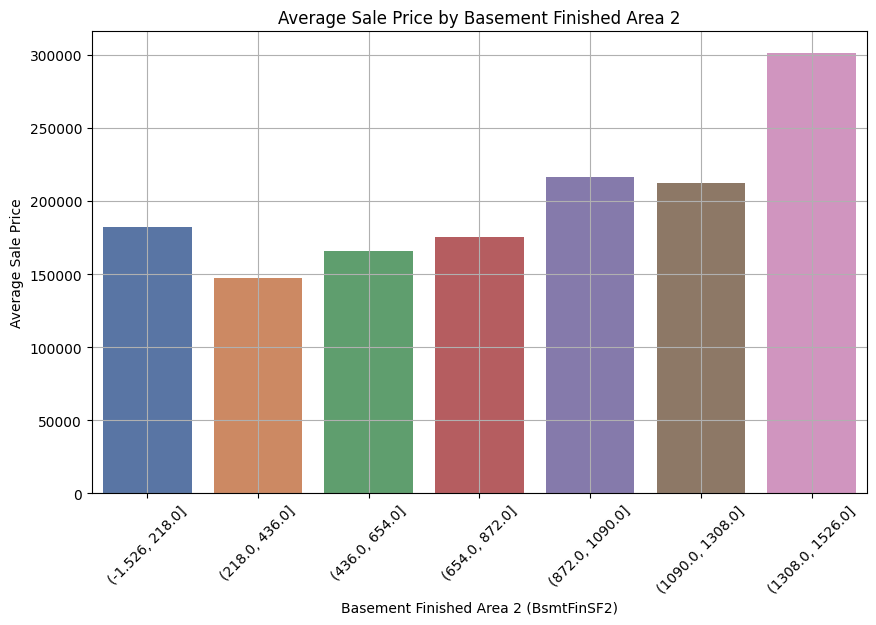

In [19]:
# Bin BsmtFinSF2 into categories
data['BsmtFinSF2_bins'] = pd.cut(data['BsmtFinSF2'], bins=7)

# calculating the average SalePrice for each bin of BsmtFinSF2
avg_sale_price = data.groupby('BsmtFinSF2_bins')['SalePrice'].mean().reset_index()

# Plot of Average Sale Price by Basement Finished Area 2
plt.figure(figsize=(10, 6))
sns.barplot(x='BsmtFinSF2_bins', y='SalePrice', data=avg_sale_price, palette='deep')
plt.xlabel('Basement Finished Area 2 (BsmtFinSF2)')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Basement Finished Area 2')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Generally, properties with higher BsmtFinSF2 tend to have a higher average sale prices. The highest average sale price is observed in the range (1308.0, 1526.0] of BsmtFinSF2.

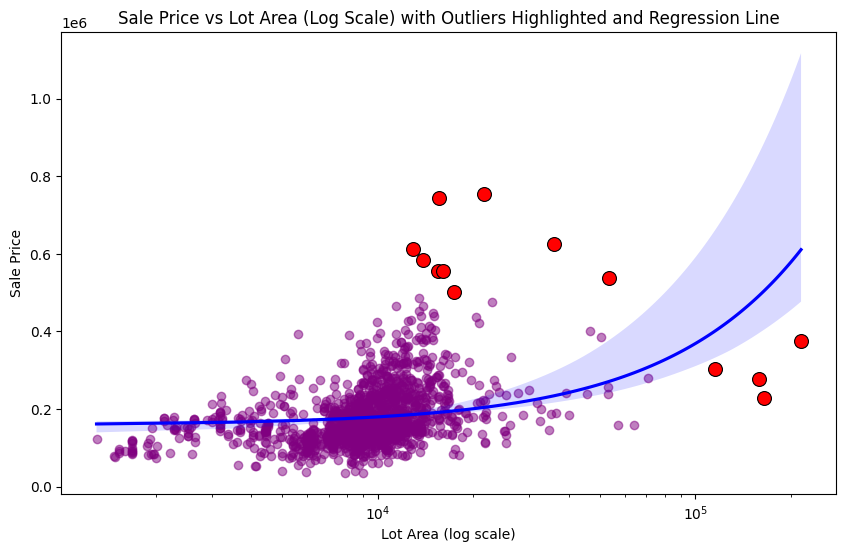

In [23]:
# Scatter plot of Sale Price vs Lot Area
# due to the positively skewed distribution of lot area data, a logrithmic scale is used 
# for the x-axis to make the plot more readable
# defining outliers based on LotArea
outliers = data[(data['LotArea'] > 100000) | (data['SalePrice'] > 500000)]

plt.figure(figsize=(10, 6))
# adding a regression line
sns.regplot(x='LotArea', y='SalePrice', data=data, scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'blue'})

# highlighting outliers
sns.scatterplot(x='LotArea', y='SalePrice', data=outliers, color='red', s=100, edgecolor='black')

# logarithmic scale for x-axis
plt.xscale('log')
plt.xlabel('Lot Area (log scale)')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Lot Area (Log Scale) with Outliers Highlighted and Regression Line')
plt.show()

The regression line shows a slight increase in sale price with increasing lot area, implying a weak relationship between the features. Most properties have a LotArea under 50,000 square feet and a sale price below $400,000. However, the outliers with large lot areas generally have higher sale prices.